# Mission 5 : Détection d’Anomalies

Les valeurs aberrantes pour le temps de jeu sont :              Date  ID_Joueur   Temps_Jeu  Victoires  Achats_Objets  \
300    2023-01-06       1129   30.000000          1              0   
383    2023-01-20       1468  213.530434          1             50   
450    2023-01-30       1892   31.372532          2             50   
465    2023-01-28       1892   30.000000          1              0   
601    2023-01-16       1049  203.766266          1             50   
...           ...        ...         ...        ...            ...   
13972  2023-01-03       1023   34.544187          0             50   
14092  2023-01-21       1610   31.043684          1              0   
14214  2023-01-01       1040   36.744346          1              0   
14581  2023-01-20       1787   30.000000          1              0   
14780  2023-01-12       1107  228.340502          4            200   

       Satisfaction Région     Serveur   Latitude   Longitude  
300            77.4     NA     Dégradé  34.5

Text(0.5, 1.0, 'Scores Z des Victoires')

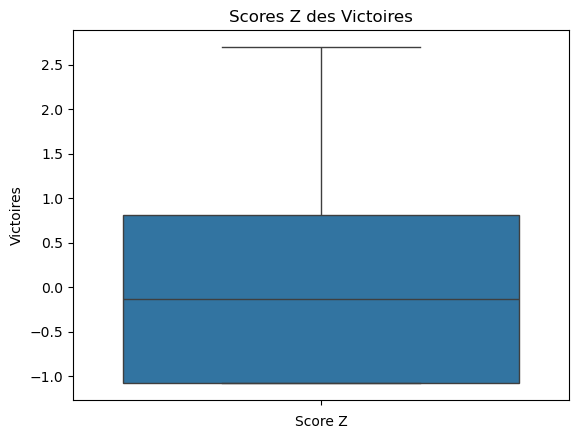

In [2]:
import pandas as pd

# Charger les données
df = pd.read_csv('game_data_complete.csv', sep=',', keep_default_na=False, na_values=['', 'NULL'])

# 1. Utilisez des méthodes statistiques pour identifier les valeurs aberrantes dans le temps de jeu et les victoires.

# Temps de jeu - On utilise la méthode IQR pour identifier les valeurs aberrantes
Q1 = df['Temps_Jeu'].quantile(0.25)
Q3 = df['Temps_Jeu'].quantile(0.75)
IQR = Q3 - Q1

outliers_game_time = df[(df['Temps_Jeu'] < (Q1 - 1.5 * IQR)) | (df['Temps_Jeu'] > (Q3 + 1.5 * IQR))]
print("Les valeurs aberrantes pour le temps de jeu sont :", outliers_game_time)

# Victoires - On utilise la méthode score Z pour identifier les valeurs aberrantes
mean_victories = df['Victoires'].mean()
std_victories = df['Victoires'].std()
victories_zscore = (df['Victoires'] - mean_victories) / std_victories

# Graphique des scores Z
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(victories_zscore)
plt.xlabel('Score Z')
plt.title('Scores Z des Victoires')

In [ ]:
# 2. Mettez en évidence les joueurs suspects.
outliers_game_time['ID_Joueur'].unique()

array([1129, 1468, 1892, 1049, 1954, 1823, 1396, 1266, 1999, 1991, 1590,
       1734, 1105, 1646, 1888, 1941, 1450, 1260, 1617, 1916, 1483, 1019,
       1651, 1022, 1891, 1117, 1101, 1441, 1350, 1730, 1840, 1099, 1804,
       1290, 1549, 1680, 1001, 1624, 1482, 1062, 1768, 1304, 1382, 1433,
       1301, 1950, 1042, 1895, 1871, 1616, 1576, 1118, 1047, 1354, 1059,
       1300, 1808, 1613, 1075, 1850, 1783, 1499, 1231, 1698, 1530, 1222,
       1948, 1014, 1054, 1379, 1899, 1601, 1405, 1159, 1626, 1887, 1196,
       1480, 1214, 1896, 1431, 1052, 1829, 1374, 1915, 1178, 1466, 1421,
       1176, 1370, 1422, 1560, 1241, 1711, 1919, 1399, 1023, 1610, 1040,
       1787, 1107], dtype=int64)